In [1]:
import os
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


In [2]:
def load_images_from_directory(directory_name):
    # Get the list of image file names in sorted order
    image_files = sorted(os.listdir(directory_name))

    # Load and store the images in a list
    images = []
    for file_name in image_files:
        if file_name.endswith('.png'):
            img_path = os.path.join(directory_name, file_name)
            img = Image.open(img_path)
            img_array = np.array(img)
            images.append(img_array)

    return images

# Load images from both directories
original_images = load_images_from_directory('./cropped_images')

# Convert the lists to arrays if needed
original_images = np.array(original_images) / 255.0

In [3]:
import numpy as np
from scipy.stats import skew, kurtosis

def load_jacobian_activation(idx):
    loaded_gradient = torch.load(f'./gradients/jacobian_gradient_{idx}.pt').detach()
  
    dimension = loaded_gradient.shape[0]
    map = loaded_gradient.permute(2, 3, 0, 1).reshape(dimension, dimension, dimension*dimension).numpy()
    avg_activation = np.mean(map, axis=2)
    max_activation = np.max(map, axis=2)

    # Normalizations
    max_value = np.max(map)
    min_value = np.min(map)
    
    avg_normalized = (avg_activation - np.min(avg_activation)) / (np.max(avg_activation) - np.min(avg_activation))
    max_normalized = (max_activation - np.min(max_activation)) / (max_value - np.min(max_activation))
    

    return avg_activation, max_activation, avg_normalized, max_normalized


(64, 64)


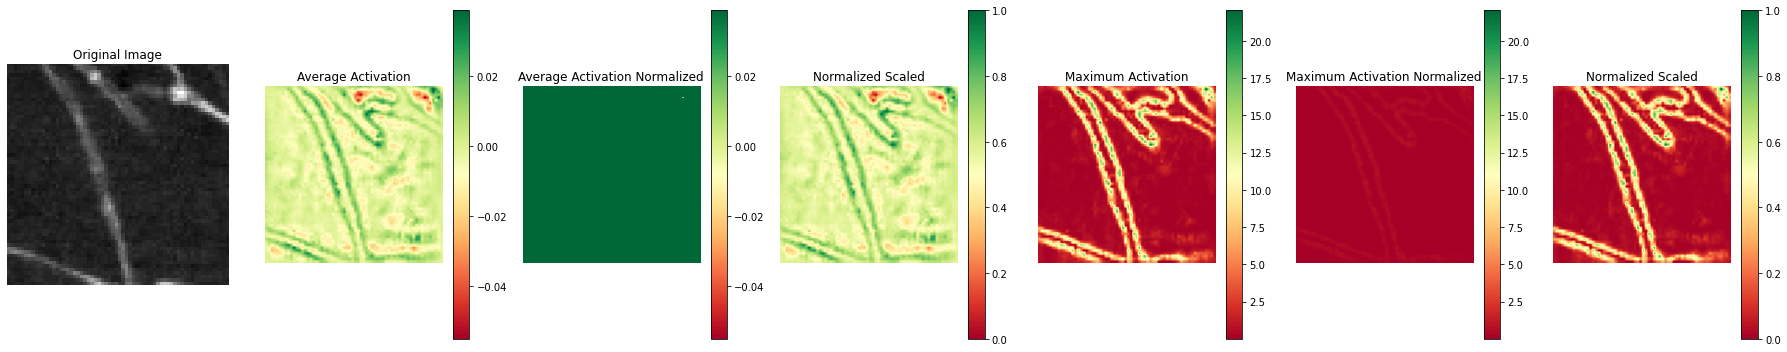

(64, 64)


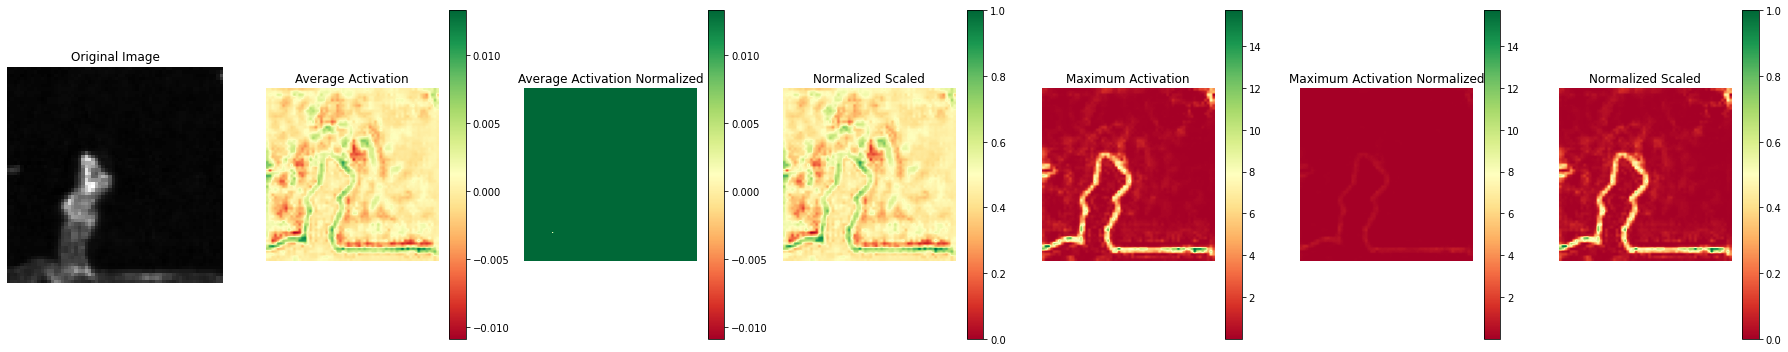

(64, 64)


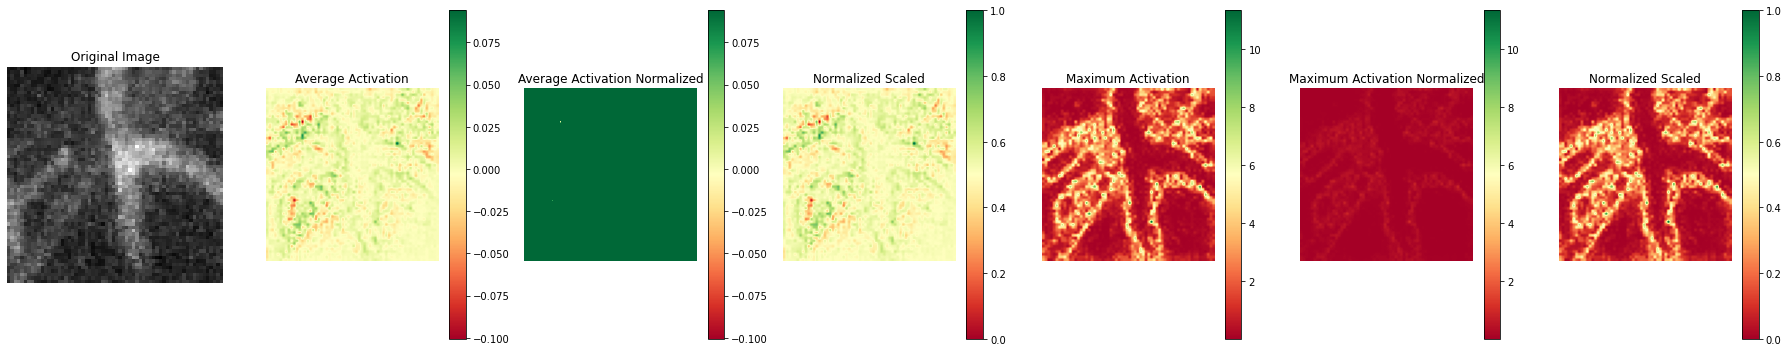

(64, 64)


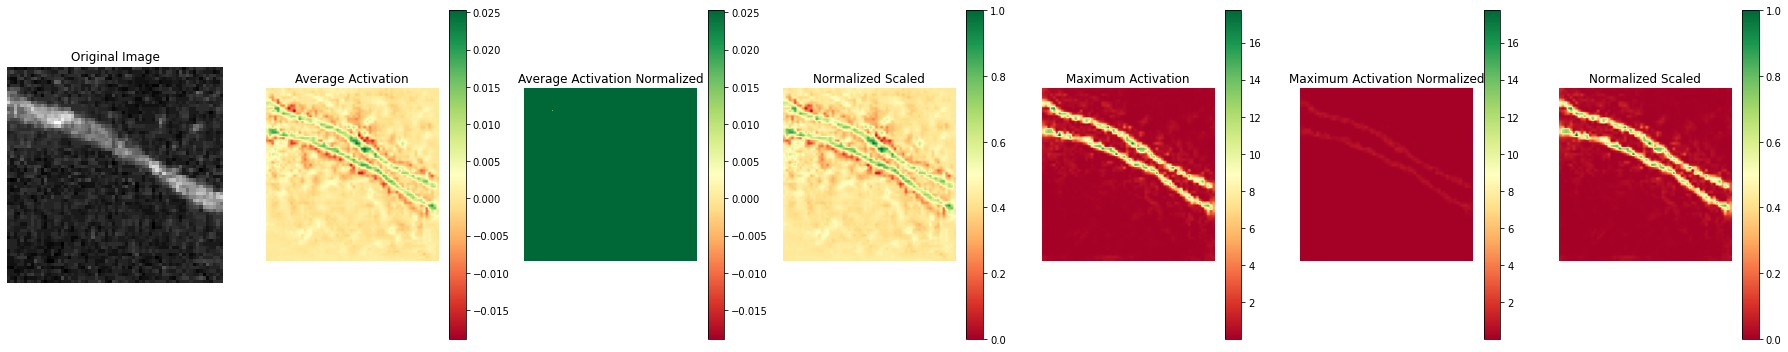

(64, 64)


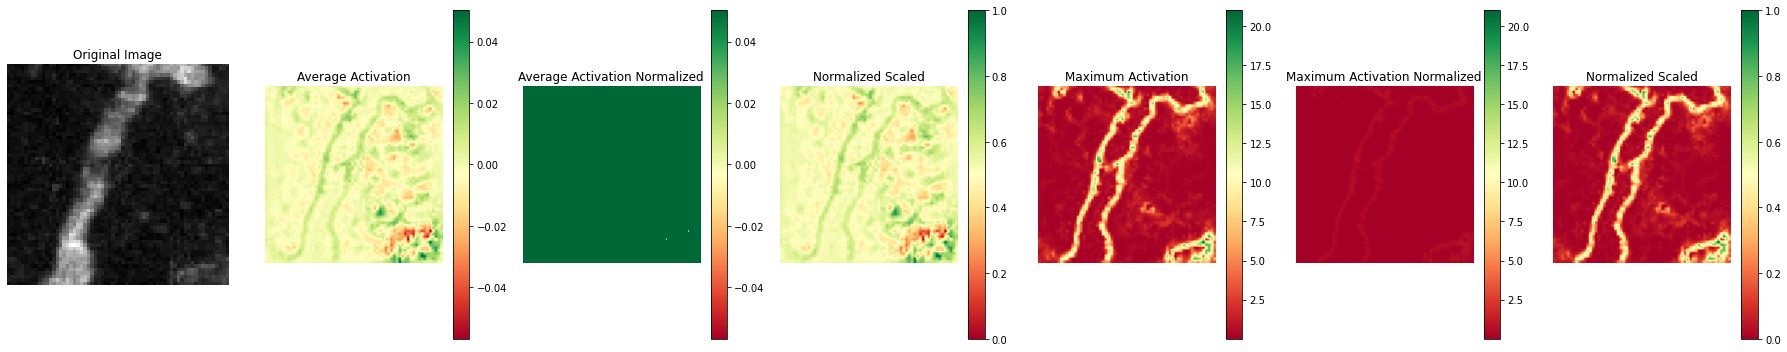

(64, 64)


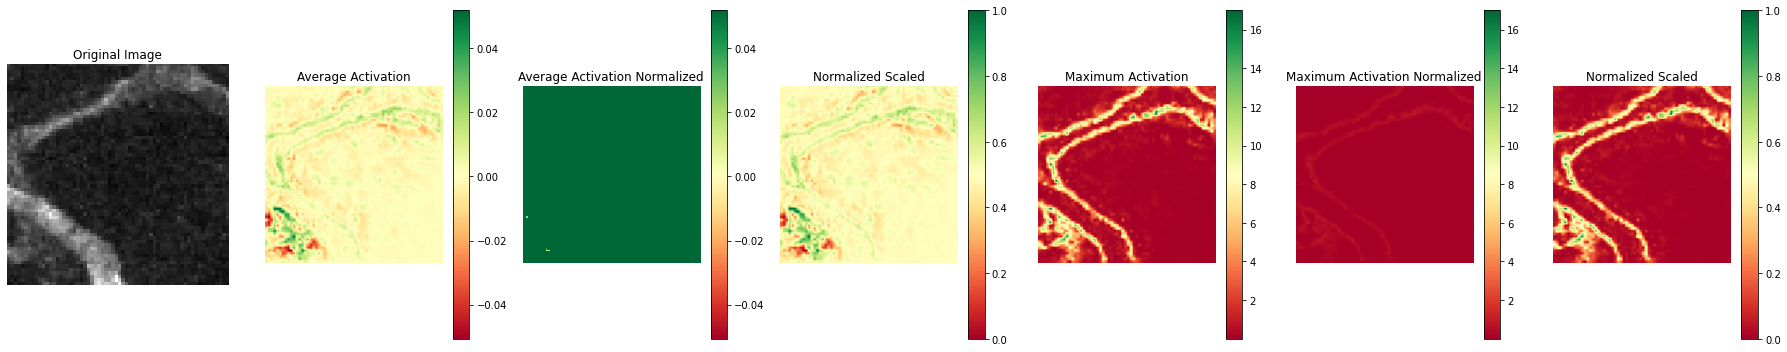

(64, 64)


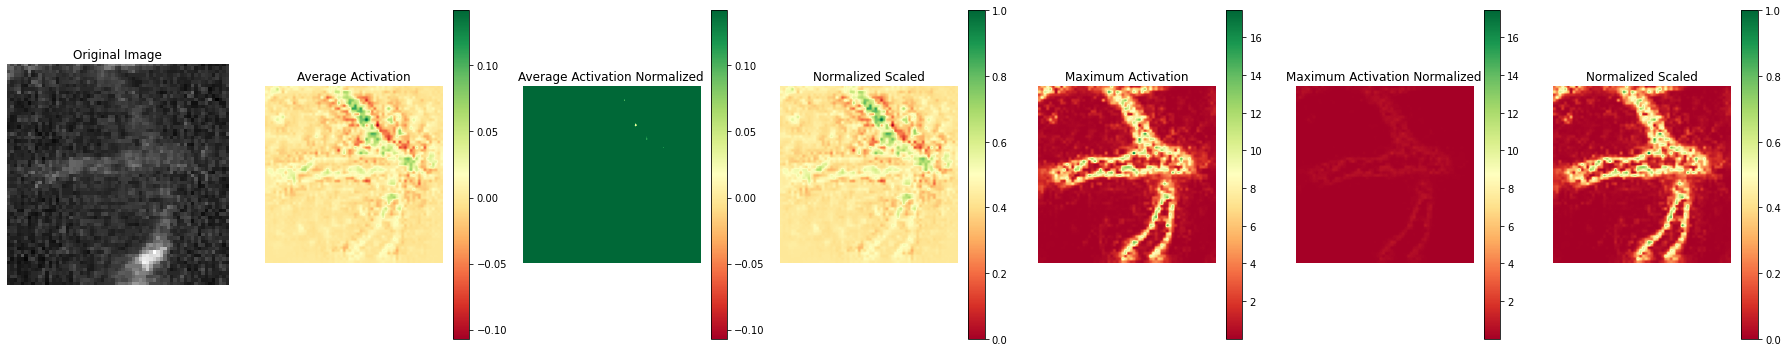

(64, 64)


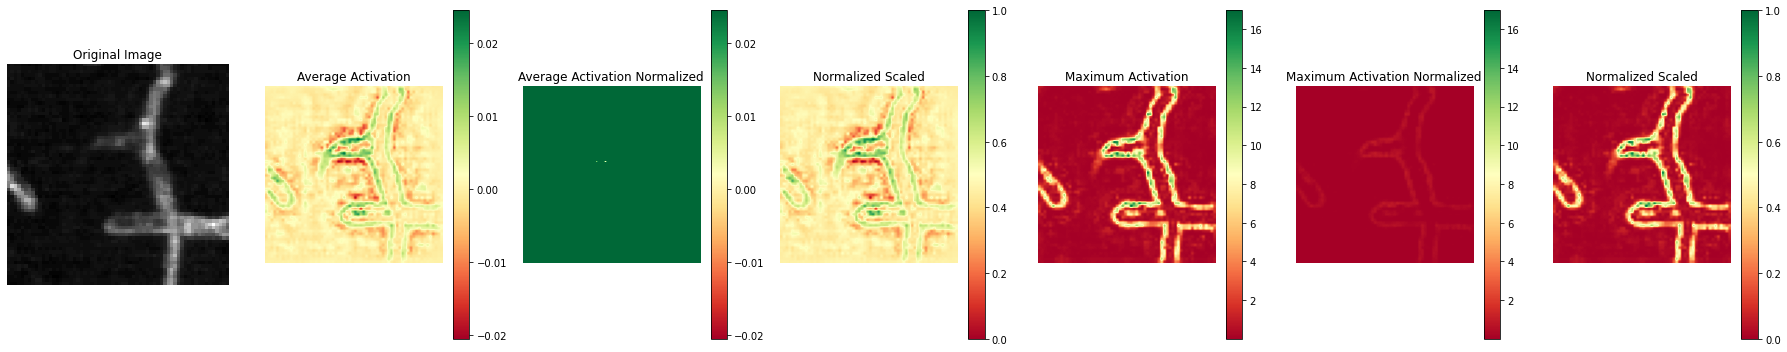

(64, 64)


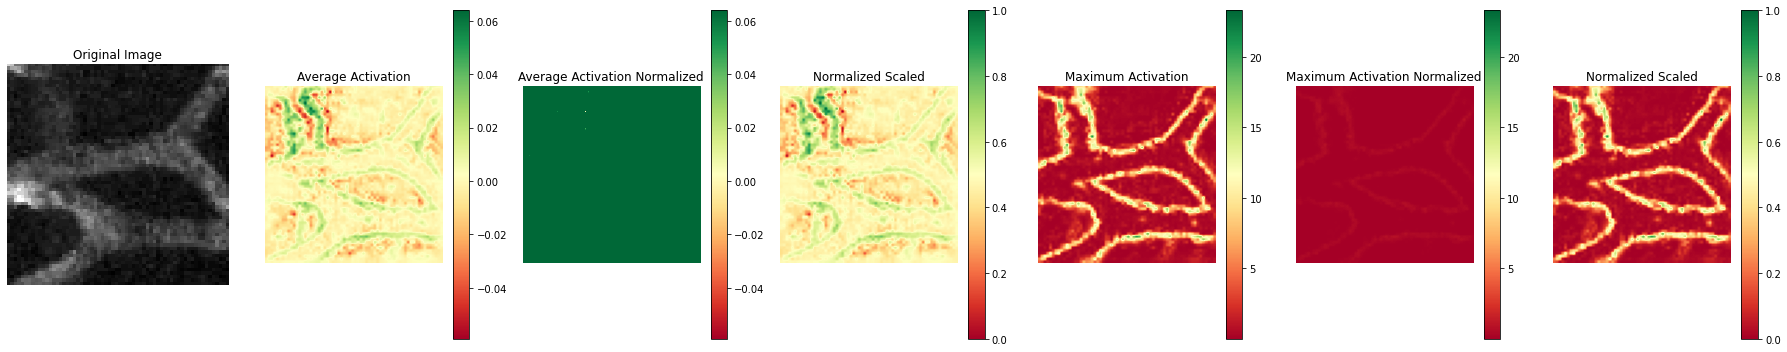

(64, 64)


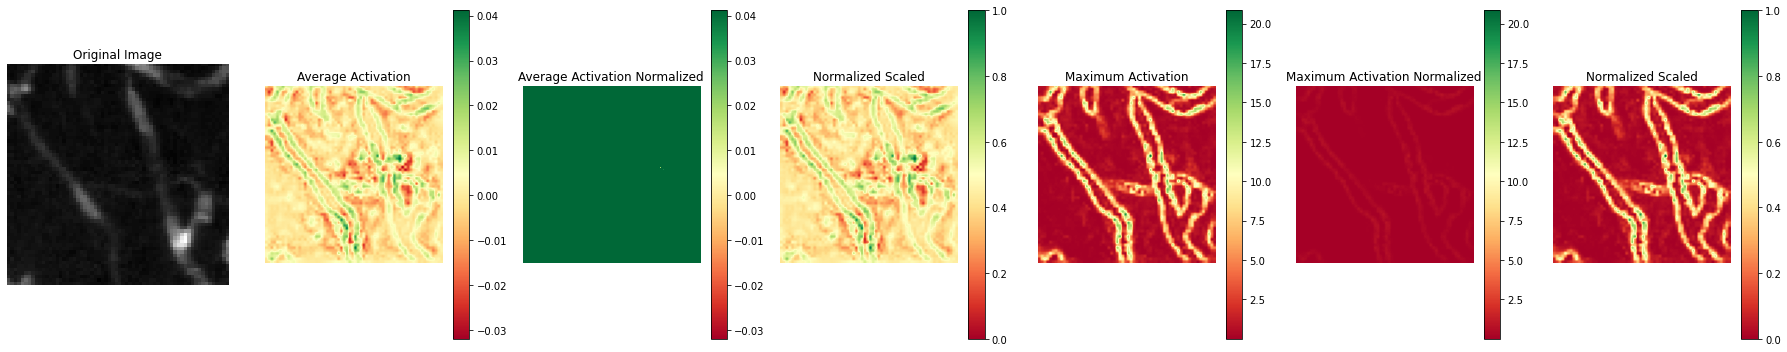

In [4]:
for idx in range(10):
    original_image = original_images[idx]
    avg_activation, max_activation, avg_normalized, max_normalized = load_jacobian_activation(idx)
    
    print(max_activation.shape)

    # Create a figure with 5 subplots
    fig, axes = plt.subplots(1, 7, figsize=(25, 5))

    # Subplot 1: Original Image
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Subplot 2: Average Activation
    avg_colorbar = axes[1].imshow(avg_activation, cmap='RdYlGn', vmin= np.min(avg_activation), vmax= np.max(avg_activation))
    axes[1].set_title("Average Activation")
    axes[1].axis('off')
    fig.colorbar(avg_colorbar, ax=axes[1])
    
    # Subplot 3: Average Activation Normalized
    axes[2].imshow(avg_normalized, cmap='RdYlGn', vmin = np.min(avg_activation), vmax = np.max(avg_activation))
    axes[2].set_title("Average Activation Normalized")
    axes[2].axis('off')
    fig.colorbar(avg_colorbar, ax=axes[2])
    
    # Subplot 3: Average Activation Normalized
    avg_colorbar_norm = axes[3].imshow(avg_normalized, cmap='RdYlGn')
    axes[3].set_title("Normalized Scaled")
    axes[3].axis('off')
    fig.colorbar(avg_colorbar_norm, ax=axes[3])

    # Subplot 4: Maximum Activation
    max_colorbar = axes[4].imshow(max_activation, cmap='RdYlGn', vmin= np.min(max_activation), vmax= np.max(max_activation))
    axes[4].set_title("Maximum Activation")
    axes[4].axis('off')
    fig.colorbar(max_colorbar, ax=axes[4])


    # Subplot 5: Maximum Activation Normalized
    axes[5].imshow(max_normalized, cmap='RdYlGn', vmin= np.min(max_activation), vmax = np.max(max_activation))
    axes[5].set_title("Maximum Activation Normalized")
    axes[5].axis('off')
    fig.colorbar(max_colorbar, ax=axes[5])
    
     # Subplot 5: Maximum Activation Normalized
    max_colorbar_norm = axes[6].imshow(max_normalized, cmap='RdYlGn')
    axes[6].set_title("Normalized Scaled")
    axes[6].axis('off')
    fig.colorbar(max_colorbar_norm, ax=axes[6])


    # Display the figure
    plt.tight_layout()
    plt.show()

In [5]:
for idx in range(1):
    avg_activation, max_activation, avg_normalized, max_normalized = load_jacobian_activation(idx)

In [6]:
14*14

196